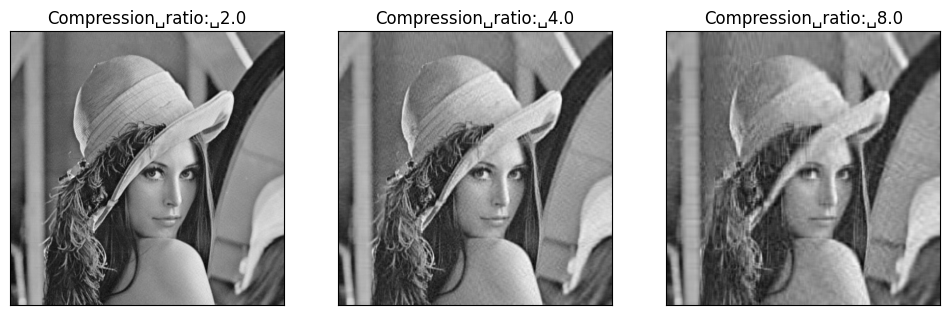

In [5]:
import numpy as np
from numpy.linalg import svd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
imgfile = "/Users/andrewhsu/Desktop/Shallow ML/Lenna.png" # 512x512x3 
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
 X = np.mean(X, axis=2) # convert RGB to grayscale
N, p = X.shape
U, E, VT = svd(X, full_matrices = False)
q = np.array([p/4, p/8, p/16]).astype('int')
fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 
for i, r in enumerate(q):
 Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] 
 ax[i].imshow(Xq, cmap = 'gray') 
 ax[i].set_title('Compression␣ratio:␣{}'.format(p/r/2)) 
 ax[i].set_xticks([])
 ax[i].set_yticks([]) 
plt.show()

In [22]:
from scipy.io import loadmat
from sklearn.datasets import fetch_openml
 
mnist = loadmat("/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/mat/mnist-original.mat")
X = mnist["data"]
y = mnist["label"][0]

X, y = fetch_openml(mnist, parser = 'auto', \
                    return_X_y = True)
X = X.T

InvalidParameterError: The 'name' parameter of fetch_openml must be an instance of 'str' or None. Got {'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014', '__version__': '1.0', '__globals__': [], 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
      dtype=object), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'label': array([[0., 0., 0., ..., 9., 9., 9.]])} instead.

In [23]:
from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784',parser='auto') 
#X = mnist.data # data
#y = mnist.target # labels
X, y = fetch_openml('mnist_784',version=1, parser = 'auto', \
                    return_X_y = True)
X = X.T

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:110: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/list/data_name/mnist_784/limit/2/data_version/1. Retrying...
  warn(


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>

In [24]:
from sklearn.datasets import fetch_openml 
import pickle
import os
data_file = 'data/mnist_digits_784.pkl'

# Check if data file exists
if os.path.isfile(data_file):
# Load data from file
 with open(data_file, 'rb') as f:
  data = pickle.load(f)
else:
# Fetch data from internet
 data = fetch_openml('mnist_784', version=1, parser='auto') # Save data to file
 with open(data_file, 'wb') as f:
      pickle.dump(data, f)
 X, y = np.array(data.data).T, np.array(data.target).astype('int')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>

In [8]:
import numpy as np
from numpy.linalg import svd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import skimage.util as skutil

imgfile = "/Users/andrewhsu/Desktop/Shallow ML/Lenna.png" # 512x512x3 
X = mpimg.imread(imgfile)
p , N = X.shape
patch_sz = 16
p_patches = patch_sz**2
N_patches = int(N*p/ p_patches)
patches = skutil.view_as_windows(X, (patch_sz, patch_sz), step = patch_sz)
M = np.empty((patch_sz*patch_sz,0))

for i in range(patches.shape[0]):
 for j in range(patches.shape[1]):
  patch = patches[i, j].reshape(-1,1)
  M = np.hstack(M, patch,axis=1)


ValueError: too many values to unpack (expected 2)

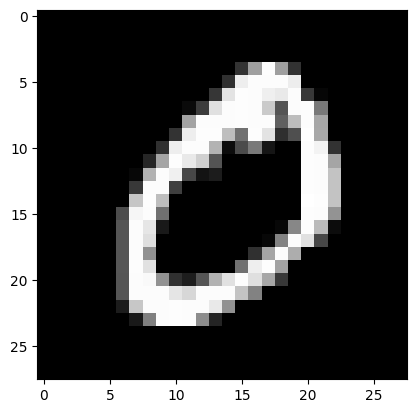

In [21]:
import matplotlib.pyplot as plt 
import numpy as np
i=0
img = X[:, i]
sz = np.sqrt(len(img)).astype('int') 
plt.imshow(np.array(img).reshape(sz, sz), cmap='gray') 
plt.show()

In [ ]:
def montage(A, m, n): 

#Create a montage matrix with mn images
#Inputs:
#A: original pxN image matrix with N images (p pixels), m, n: m rows & n columns, total mn images
#Output:
#M: montage matrix containing mn images

sz = np.sqrt(A.shape[0]).astype('int') # image size sz 
M = np.zeros((m*sz, n*sz)) # montage image
for i in range(m) :
for j in range(n) :
M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \ A[:, i*n+j].reshape(sz, sz)
return M